# PROBLEM 1: Topic Models

## Obtain Topic Models (K=10, 20, 50) for both datasets by running LDA and NMF methods; you can call libraries for both methods and dont have to use the ES index as source. For both LDA and NMF: print out for each topic the top 20 words (with probabilities)

### 20ng

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation, NMF

def get_top_words(n_com):
    df = pd.read_csv('20ng.csv')
    df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

    df.dropna(inplace=True)
    vectorizer = TfidfVectorizer(use_idf=False)
    count_vectorizer = CountVectorizer(stop_words='english')

    sparse_matrix = vectorizer.fit_transform(df['content'])
    sparse_matrix_count = count_vectorizer.fit_transform(df['content'])

    lda = LatentDirichletAllocation(n_components=n_com, random_state=42)
    top_topics = lda.fit_transform(sparse_matrix_count)

    words = count_vectorizer.get_feature_names_out()

    topic_word_dist = lda.components_

    count = 0

    for topic in topic_word_dist:
        print("Topic", count, ": ", words[topic.argsort()[-20:][::-1]])
        print("Probabilities", count, ": ", topic[topic.argsort()[-20:][::-1]])
        print()
        count+=1

    

In [12]:
get_top_words(10)

Topic 0 :  ['comp' 'edu' 'windows' 'sys' 'pc' 'mac' 'hardware' 'misc' 'file' 'use'
 'os' 'dos' 'com' 'drive' 'software' 'graphics' 'ibm' 'ms' 'forsale'
 'card']
Probabilities 0 :  [5621.71977098 4910.15102413 4539.78241092 3292.5282543  3108.84351303
 2989.92339847 2940.58548018 2337.25372131 2232.73845857 2227.41102764
 2175.89733067 2141.79536886 2018.68867194 1939.94588482 1914.91755173
 1884.52298981 1815.61830579 1801.81534216 1761.41594201 1721.1144262 ]

Topic 1 :  ['edu' 'rutgers' 'com' 'god' 'christian' 'people' 'cmu' 'cs' 'don' 'think'
 'srv' 'religion' 'say' 'net' 'cantaloupe' 'writes' 'talk' 'does' 'just'
 '1993']
Probabilities 1 :  [12702.2782419   6275.36441786  5000.97742681  4817.17844348
  4802.63106999  4579.89295822  3727.91483913  3583.5655832
  2917.69592897  2834.20077412  2826.87764233  2691.26918281
  2594.11749596  2565.14555357  2372.6323274   2367.35215344
  2345.71189046  2291.87441582  2276.7070534   2140.75169733]

Topic 2 :  ['windows' 'window' 'motif' 'c

In [13]:
get_top_words(20)

Topic 0 :  ['sys' 'scsi' 'card' 'hardware' 'pc' 'drive' 'ibm' 'comp' 'mac' 'bus' 'db'
 'ide' 'disk' 'com' 'controller' 'drives' 'drivers' 'edu' 'video' 'hard']
Probabilities 0 :  [1628.44757337 1485.07811774 1437.82793795 1414.83398122 1406.23684031
 1242.92938216 1121.22464928 1097.65665736  964.17823066  738.0594933
  723.00288169  647.13385652  629.68693456  605.18980058  582.71717288
  487.44746549  487.10246853  478.87840287  445.74067795  437.68096394]

Topic 1 :  ['edu' 'rutgers' 'god' 'christian' 'people' 'religion' 'jesus' 'athos'
 'com' 'think' 'say' 'don' 'geneva' 'does' 'cs' '1993' 'net' 'know'
 'believe' 'cmu']
Probabilities 1 :  [6236.25359111 6161.27459713 4615.62157034 4525.77976922 2309.3466784
 2080.08308388 2002.9477691  1863.08651597 1686.75387935 1552.44341827
 1492.21089721 1469.509582   1457.44597868 1377.25379401 1360.78563188
 1350.60921171 1316.14809928 1292.00902355 1274.59082172 1261.85781097]

Topic 2 :  ['window' 'windows' 'motif' 'xterm' 'lib' 'x11' 'widg

In [ ]:
get_top_words(50)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation, NMF

def get_top_words_nmf(n_com):
    df = pd.read_csv('20ng.csv')
    df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

    df.dropna(inplace=True)
    vectorizer = TfidfVectorizer(use_idf=False, stop_words='english')

    sparse_matrix = vectorizer.fit_transform(df['content'])

    nmf = NMF(n_components=n_com, random_state=42)
    top_topics = nmf.fit_transform(sparse_matrix)

    words = vectorizer.get_feature_names_out()

    topic_word_dist = nmf.components_

    count = 0

    for topic in topic_word_dist:
        print("Topic", count, ": ", words[topic.argsort()[-20:][::-1]])
        print("Probabilities", count, ": ", topic[topic.argsort()[-20:][::-1]])
        print()
        count+=1

    

In [30]:
get_top_words_nmf(10)

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0 :  ['edu' 'state' 'ohio' 'cmu' 'news' 'cc' 'mps' 'zaphod' 'cis' 'sei'
 'university' 'apr' 'lines' 'organization' 'id' 'subject' 'path' 'message'
 'date' 'newsgroups']
Probabilities 0 :  [6.7863813  1.29402923 1.16026428 1.13217365 1.06112961 0.64314858
 0.59744577 0.51370362 0.44640693 0.40421859 0.36357551 0.35999875
 0.32725724 0.32685698 0.32455437 0.3238008  0.32318903 0.32290358
 0.32096028 0.31844219]

Topic 1 :  ['com' 'cmu' 'hp' 'srv' 'netcom' 'writes' 'apr' 'references' 'article'
 'message' 'id' 'gmt' 'news' 'cantaloupe' 'date' 'newsgroups' 'path' 'net'
 'sun' 'organization']
Probabilities 1 :  [5.04427969 0.57968831 0.52700393 0.37715301 0.35866195 0.35026785
 0.31541821 0.31347337 0.3047231  0.3020724  0.29078891 0.29070099
 0.28723144 0.28572925 0.28147306 0.28005478 0.2792729  0.27780788
 0.27545099 0.27475198]

Topic 2 :  ['edu' 'cmu' 'cs' 'srv' 'crabapple' 'eng' 'ece' 'fs7' 'gtefsd' 'europa'
 'cantaloupe' 'sci' 'apr' 'lines' 'message' 'subject' 'date' 'newsgroups

In [31]:
get_top_words_nmf(20)

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0 :  ['edu' 'university' 'article' 'nntp' 'references' 'writes' 'host'
 'posting' 'usenet' 'cwru' 'organization' 'apr' 'gmt' 'path' 'cs' 'lines'
 'subject' 'date' 'newsgroups' 'id']
Probabilities 0 :  [7.62643766 0.54771708 0.51401596 0.49019393 0.47290314 0.45064154
 0.42343181 0.42329212 0.3484428  0.33084927 0.30667936 0.29202513
 0.29057342 0.274402   0.2735532  0.2734399  0.27339066 0.26834618
 0.26584794 0.26201402]

Topic 1 :  ['com' 'hp' 'writes' 'references' 'netcom' 'article' 'sun' 'gmt' 'apr'
 'message' 'id' 'apple' 'ibm' 'srv' 'organization' 'path' 'date'
 'newsgroups' 'subject' 'att']
Probabilities 1 :  [5.37076552 0.54815499 0.40395766 0.38473732 0.37022964 0.36254659
 0.29241328 0.25766378 0.23709364 0.22158971 0.21493191 0.21447349
 0.21348848 0.21342285 0.21241334 0.20809287 0.20681528 0.20572831
 0.19909217 0.1987577 ]

Topic 2 :  ['net' 'ans' 'reston' 'howland' 'near' 'noc' 'harvard' 'das' 'id' 'lines'
 'subject' 'date' 'message' 'newsgroups' 'path' 'organizati

In [32]:
get_top_words_nmf(50)

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0 :  ['edu' 'university' 'references' 'stanford' 'organization' 'washington'
 'srv' 'path' 'subject' 'uwm' 'lines' 'newsgroups' 'id' 'date' '93'
 'cantaloupe' 'apr' 'umd' 'message' 'netnews']
Probabilities 0 :  [8.70216219 0.51685259 0.25536225 0.14896857 0.13551739 0.13499366
 0.13198614 0.12405102 0.11262851 0.11261377 0.11078288 0.10771752
 0.09937711 0.09576537 0.09294922 0.09109787 0.09060639 0.07863805
 0.07569171 0.07458387]

Topic 1 :  ['com' 'edu' 'references' 'uunet' 'srv' 'apr' 'path' 'id' 'newsgroups'
 'message' 'date' 'organization' 'subject' 'lines' 'mot' 'dec' '93'
 'cantaloupe' 'ti' 'gmt']
Probabilities 1 :  [6.20287187 0.74706168 0.21653338 0.19166652 0.16088702 0.148611
 0.1464849  0.14419949 0.14374378 0.13442455 0.13172336 0.13088226
 0.1295925  0.1212702  0.12114285 0.11910908 0.11294584 0.11244751
 0.11068076 0.10025922]

Topic 2 :  ['net' 'ans' 'howland' 'reston' 'near' 'noc' 'harvard' 'das' 'lines' 'id'
 'date' 'subject' 'newsgroups' 'message' 'path' 'orga

### DUC2001

In [15]:
def get_top_words_duc_lda(n_com):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    import pandas as pd
    from sklearn.decomposition import LatentDirichletAllocation, NMF

    df_duc = pd.read_csv('DUC2001.csv')
    df_duc.dropna(inplace=True)
    
    count_vectorizer = CountVectorizer(stop_words='english')
    
    sparse_matrix_count = count_vectorizer.fit_transform(df_duc['content'])

    
    lda = LatentDirichletAllocation(n_components=n_com, random_state=42)
    top_topics = lda.fit_transform(sparse_matrix_count)

    words = count_vectorizer.get_feature_names_out()

    topic_word_dist = lda.components_

    count = 0

    for topic in topic_word_dist:
        print("Topic", count, ": ", words[topic.argsort()[-20:][::-1]])
        print("Probabilities", count, ": ", topic[topic.argsort()[-20:][::-1]])
        print()
        count+=1

In [12]:
get_top_words_duc_lda(10)

Topic 0 :  ['crashed' 'air' 'aircraft' 'crash' 'united' 'force' 'states' 'pilot'
 'flight' 'miles' 'killed' 'training' 'government' 'base' 'jet' 'west'
 '10' 'south' 'hurricane' 'fighter']
Probabilities 0 :  [22.24429198 17.78617869 17.09207148 13.64698127 12.96628128 12.76925919
 10.63827612 10.1234521  10.00177771  9.87412587  8.63873861  7.93086035
  7.63993023  7.28106779  7.0999893   6.84911482  6.68679619  6.30208694
  6.18799007  6.09999574]

Topic 1 :  ['said' 'taylor' 'pneumonia' 'miss' 'hospital' 'johnson' 'doctors'
 'control' 'gun' 'jackson' 'year' '000' 'nafta' 'st' 'exxon' 'elizabeth'
 'states' 'john' 'dickey' 'fires']
Probabilities 1 :  [38.29144909 28.09996685 22.09999291 17.09999274 17.0999735  16.09998991
 15.09998694 15.05743572 14.10001084 13.09997056 12.90412225 10.87903864
 10.10000166 10.0999959  10.09998267 10.09998247  9.98901024  9.09999822
  9.09996976  9.07256162]

Topic 2 :  ['slovenia' 'new' 'said' 'welfare' 'hurricanes' 'hurricane' 'billion'
 'world' 'atla

In [13]:
get_top_words_duc_lda(20)

Topic 0 :  ['crashed' 'air' '10' 'force' 'crash' 'german' 'disease' 'aircraft' 'oil'
 'exxon' 'miles' 'risk' 'gilbert' 'bse' 'united' 'west' 'states' 'valdez'
 'spill' 'today']
Probabilities 0 :  [11.42667874 11.31074184 10.05        8.97220357  7.82354075  7.05
  6.05        6.05        5.1637135   5.1637135   5.14722493  5.05
  5.05        5.05        5.05        4.70256334  4.30191005  4.14734927
  4.13919365  4.05      ]

Topic 1 :  ['acres' 'said' 'states' 'welfare' 'taylor' 'control' 'fires' '000' 'gun'
 'work' 'miss' 'jackson' 'dr' 'hospital' 'million' 'california' 'believe'
 'federal' 'president' 'base']
Probabilities 1 :  [10.05        9.97624884  9.49388516  9.05        9.05        8.67017721
  7.6648967   7.18156777  7.05        6.05        6.05        6.05
  5.05        5.05        4.78181489  4.5899276   4.05        4.05
  4.05        4.05      ]

Topic 2 :  ['hurricanes' 'hurricane' 'disease' 'storms' 'gray' 'atlantic' 'welfare'
 'sahel' 'rainfall' 'average' 'atmospheric'

In [14]:
get_top_words_duc_lda(50)

Topic 0 :  ['air' 'crashed' 'german' 'better' 'force' 'zanti' 'disease' 'exxon'
 'west' 'limits' 'pilot' 'diamonds' 'valdez' 'barro' 'running' 'crash'
 'oil' 'market' 'aircraft' '10']
Probabilities 0 :  [6.02 5.02 4.02 4.02 4.02 4.02 4.02 4.02 4.02 4.02 3.02 3.02 3.02 3.02
 3.02 3.02 3.02 3.02 3.02 3.02]

Topic 1 :  ['jackson' 'police' 'dickey' 'white' 'brutality' 'glass' 'said' 'gates'
 'hurricane' 'andrew' 'florida' 'officers' 'beach' 'plate' 'long' 'window'
 'emergency' 'chief' 'johnson' 'steroids']
Probabilities 1 :  [13.02       11.02        9.02        6.02        5.02        5.02
  4.56168899  4.02        4.02        4.02        4.02        4.02
  4.02        4.02        4.02        4.02        3.02        3.02
  3.02        3.02      ]

Topic 2 :  ['bauer' 'skinner' 'national' 'johnson' 'poor' 'said' 'race' 'pounds'
 'shape' 'countries' 'comments' 'loans' 'caused' 'believes' 'policies'
 'blazes' '50' 'caught' 'second' '500']
Probabilities 2 :  [6.02 4.02 3.02 3.02 3.02 2.02 2.0

In [25]:
def get_top_words_duc_nmf(n_com):
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    import pandas as pd
    from sklearn.decomposition import LatentDirichletAllocation, NMF

    df_duc = pd.read_csv('DUC2001.csv')
    df_duc.dropna(inplace=True)
    
    vectorizer = TfidfVectorizer(use_idf=False, stop_words='english')
    sparse_matrix = vectorizer.fit_transform(df_duc['content'])

    
    nmf = NMF(n_components=n_com, random_state=42)
    top_topics = nmf.fit_transform(sparse_matrix)

    words = vectorizer.get_feature_names_out()

    topic_word_dist = nmf.components_

    count = 0

    for topic in topic_word_dist:
        print("Topic", count, ": ", words[topic.argsort()[-20:][::-1]])
        print("Probabilities", count, ": ", topic[topic.argsort()[-20:][::-1]])
        print()
        count+=1

In [26]:
get_top_words_duc_nmf(10)

Topic 0 :  ['slovenia' 'world' 'welfare' 'new' 'president' 'nafta' 'bank'
 'government' 'states' 'census' 'years' 'reform' 'support' 'beers' 'house'
 'federal' 'diamond' 'slovenian' 'limits' 'illegal']
Probabilities 0 :  [0.70835256 0.57753942 0.56704927 0.53555785 0.50149415 0.4906966
 0.46286255 0.45675284 0.39244844 0.34410715 0.32825322 0.32399836
 0.31065553 0.29956515 0.29352448 0.29294784 0.29045402 0.2884068
 0.27392973 0.26753463]

Topic 1 :  ['johnson' 'said' 'canadian' 'drug' 'ben' 'lewis' 'francis' 'sprinter'
 'steroids' 'olympics' 'test' 'drugs' 'gold' 'medal' 'coach' 'seoul'
 'carl' 'astaphan' 'canada' 'performance']
Probabilities 1 :  [1.01604836 0.61869948 0.2585079  0.2510949  0.24466025 0.23343524
 0.21107294 0.18540986 0.17205182 0.17040504 0.16841588 0.16096384
 0.14795781 0.14484452 0.14355832 0.13767322 0.13149151 0.12921283
 0.12752983 0.12302901]

Topic 2 :  ['hurricane' 'people' 'florida' 'gilbert' 'storm' 'hurricanes' 'winds'
 'hit' 'andrew' 'storms' 'atlantic

In [27]:
get_top_words_duc_nmf(20)

Topic 0 :  ['nafta' 'mexico' 'president' 'clinton' 'support' 'labor' 'environmental'
 'fear' 'environment' 'hispanic' 'agreements' 'house' 'perot' 'american'
 'trade' 'anti' 'opposition' 'jobs' 'mexican' 'business']
Probabilities 0 :  [3.68975915 1.05871419 1.03704819 0.88113799 0.8540427  0.69443115
 0.61894135 0.54340764 0.52926656 0.52490889 0.48857324 0.46479564
 0.45821405 0.45492261 0.45032619 0.44054078 0.42676394 0.4246853
 0.4192059  0.41581308]

Topic 1 :  ['johnson' 'said' 'canadian' 'drug' 'ben' 'lewis' 'francis' 'sprinter'
 'steroids' 'olympics' 'test' 'drugs' 'gold' 'medal' 'coach' 'seoul'
 'carl' 'astaphan' 'canada' 'performance']
Probabilities 1 :  [1.03873139 0.6245825  0.26479277 0.25079151 0.25071844 0.23474011
 0.21772425 0.18990808 0.1760854  0.17476474 0.17316808 0.16219542
 0.14965038 0.14851704 0.14645805 0.14082969 0.1336493  0.13217376
 0.13026285 0.12220356]

Topic 2 :  ['hurricane' 'florida' 'gilbert' 'storm' 'people' 'hurricanes' 'winds'
 'hit' 'andrew' 'st

In [28]:
get_top_words_duc_nmf(50)

Topic 0 :  ['nafta' 'mexico' 'clinton' 'president' 'support' 'labor' 'environmental'
 'environment' 'fear' 'hispanic' 'agreements' 'perot' 'trade' 'anti'
 'jobs' 'business' 'house' 'american' 'opposition' 'congressmen']
Probabilities 0 :  [19.4211444   4.87595476  4.57292007  4.48938844  4.21157338  3.61226858
  3.21469072  2.8346684   2.61531524  2.58253938  2.55393155  2.39917804
  2.37206619  2.34492503  2.22896505  2.20619383  2.15950857  2.12420453
  2.11393053  2.09351293]

Topic 1 :  ['johnson' 'said' 'canadian' 'ben' 'lewis' 'drug' 'francis' 'sprinter'
 'steroids' 'olympics' 'test' 'drugs' 'gold' 'coach' 'medal' 'seoul'
 'carl' 'astaphan' 'canada' 'performance']
Probabilities 1 :  [1.17051895 0.64687595 0.29845858 0.28155382 0.26539327 0.26357686
 0.24723334 0.20981286 0.19748843 0.19689953 0.19613821 0.18227273
 0.16679759 0.16593011 0.16560621 0.15702185 0.15049628 0.14596302
 0.14152112 0.13674623]

Topic 2 :  ['hurricane' 'gilbert' 'storm' 'winds' 'center' 'western' 'hemisp

/home/khairnar.as/.conda/envs/myenv/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


## The rest of of topic exercises and results are required only for the LDA topics:- 20NG: how well the topics align with the 20NG label classes? This is not asking for a measurement, but rather for a visual inspection to determine what topics match well with what classes. Does this change if one increases the topics from 20 to 50?

In [38]:
df = pd.read_csv('20ng.csv')
df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

df.dropna(inplace=True)
vectorizer = TfidfVectorizer(use_idf=False)
count_vectorizer = CountVectorizer(stop_words='english')

sparse_matrix_count = count_vectorizer.fit_transform(df['content'])

lda = LatentDirichletAllocation(n_components=10, random_state=42)
top_topics = lda.fit_transform(sparse_matrix_count)

words = count_vectorizer.get_feature_names_out()

topic_word_dist = lda.components_


In [63]:
df = pd.read_csv('20ng.csv')
df.dropna(inplace=True)
df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

In [64]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df['index'])


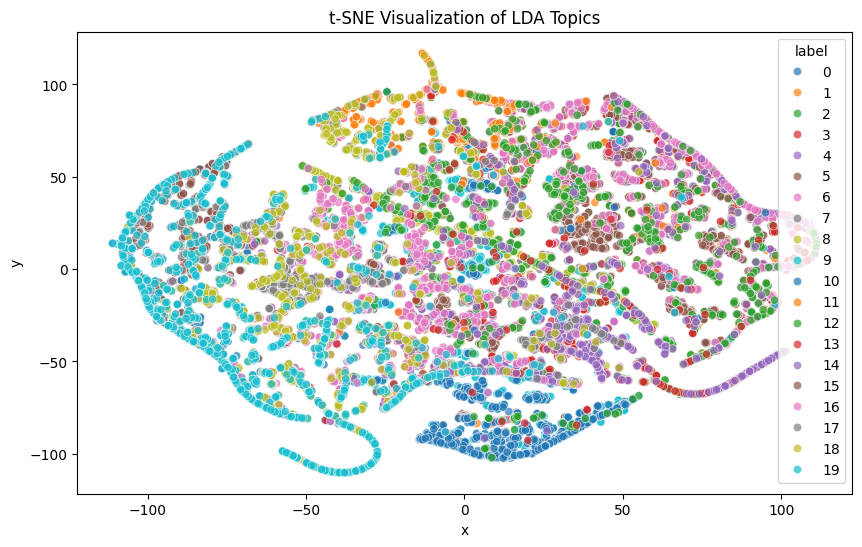

In [69]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

topic_distributions = lda.transform(sparse_matrix_count)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(topic_distributions)

df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['label'] = encoded_labels  

plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', hue=df_tsne['label'], palette="tab10", data=df_tsne, alpha=0.7)
plt.show()


In [72]:
df = pd.read_csv('20ng.csv')
df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

df.dropna(inplace=True)
vectorizer = TfidfVectorizer(use_idf=False)
count_vectorizer = CountVectorizer(stop_words='english')

sparse_matrix_count = count_vectorizer.fit_transform(df['content'])

lda = LatentDirichletAllocation(n_components=50, random_state=42)
top_topics = lda.fit_transform(sparse_matrix_count)

words = count_vectorizer.get_feature_names_out()

topic_word_dist = lda.components_


In [73]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('20ng.csv')
df.dropna(inplace=True)
df['index'] = df['index'].str.replace(r'\d+$', '', regex=True)

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(df['index'])


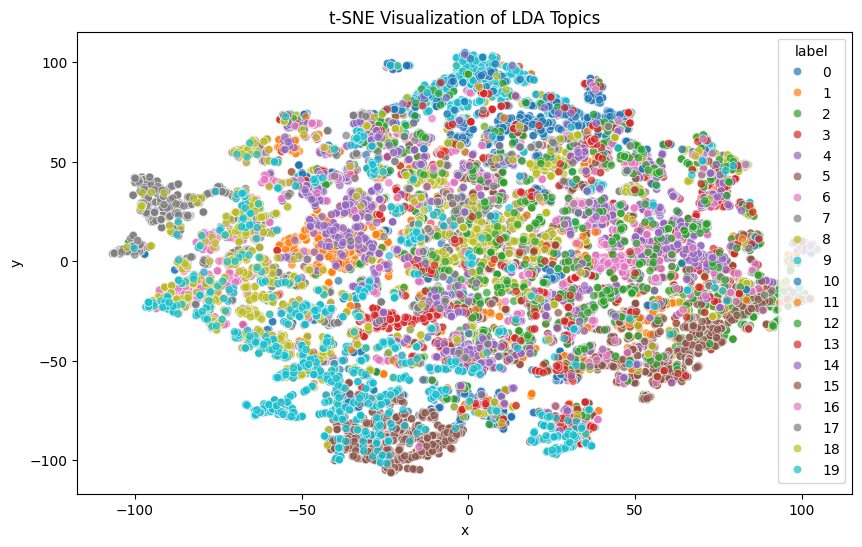

In [75]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

topic_distributions = lda.transform(sparse_matrix_count)
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(topic_distributions)

df_tsne = pd.DataFrame(tsne_results, columns=['f1', 'f2'])
df_tsne['label'] = encoded_labels  

plt.figure(figsize=(10, 6))
sns.scatterplot(x='f1', y='f1', hue=df_tsne['label'], palette="tab10", data=df_tsne, alpha=0.7)


We can observe for n_components = 20, we have some clusters like 0 and 9, but we cannot see all the 20 groups which are in the dataset. This is because the dataset has some group close in the concepts, and this makes two groups very similar. On the other hand, if we see the plot for n_components = 50, it gets more sparsed as compared to 20 topics because there are only 20 groups in the dataset. If we try to categroize it in 50 classes it cannot be visualized.